## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
user_num = df.user_id.nunique()
user_num

290584

d. The proportion of users converted.

In [5]:
df_unique = df.drop_duplicates('user_id')
p_conv = df_unique.converted.value_counts()[1] / user_num
p_conv

0.11956955647936569

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df.groupby(['group', 'landing_page']).count()

user_id  timestamp  converted
group     landing_page                               
control   new_page         1928       1928       1928
          old_page       145274     145274     145274
treatment new_page       145311     145311     145311
          old_page         1965       1965       1965

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2a = df.query('landing_page == "new_page" and group == "treatment"')
df2b = df.query('landing_page == "old_page" and group == "control"')

In [9]:
df2 = pd.concat([df2a,df2b], ignore_index=True)

In [10]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2.user_id.value_counts().nlargest(5)

773192    2
630732    1
811737    1
797392    1
795345    1
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
double_user = df2.query('user_id == "773192"')
double_user

,user_id,timestamp,group,landing_page,converted
938,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop(index=938)

In [16]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [17]:
df2_copy = df2.copy()

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [18]:
p_conv_new = df2.converted.mean()
p_conv_new

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
df2.groupby(['group', 'converted']).count()

user_id  timestamp  landing_page
group     converted                                  
control   0           127785     127785        127785
          1            17489      17489         17489
treatment 0           128046     128046        128046
          1            17264      17264         17264

In [20]:
p_contr_conv = df2.query('group == "control"').converted.mean()
p_contr_conv

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
p_treat_conv = df2.query('group == "treatment"').converted.mean()
p_treat_conv

0.11880806551510564

In [22]:
obs_diff = p_treat_conv - p_contr_conv
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [23]:
new_page = df2.landing_page.value_counts()
new_page

new_page    145310
old_page    145274
Name: landing_page, dtype: int64

In [24]:
p_np = new_page[0]/df2.shape[0]
p_np

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer**

It looks like there is almost no change in the probabilities that one individual converts:
* the overall probability to convert is approx. 12% 
* the probability that an individual converts after receiving the old page is 12% 
* and the probability that an individual converts after receiving the new page is also approx. 12%

To sum up, there is no significant change in the probabilities at first sight.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_0$ : $P_{new}$ - $P_{old}$ ≤ 0** 

**$H_1$: $P_{new}$ - $P_{old}$ > 0**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
p_new = p_conv
p_new

0.11956955647936569

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old = p_conv
p_old

0.11956955647936569

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
n_new = df2.query('group == "treatment"').user_id.nunique()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
n_old = df2.query('group != "treatment"').user_id.nunique()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
diffs = new_page_converted.mean() - old_page_converted.mean()
diffs

0.0010371769682055026

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [32]:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, 
                                          p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, 
                                          p=[1-p_old, p_old])
    diffs = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

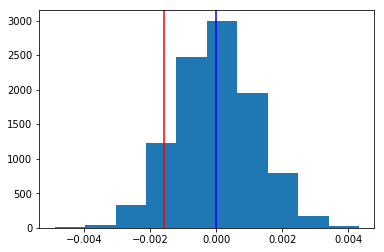

In [33]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(obs_diff, color='red');
plt.axvline(0,color='blue');

In [34]:
np.std(p_diffs), np.mean(p_diffs)

(0.0012023313655184036, -5.7049157175503016e-06)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [35]:
(p_diffs > obs_diff).mean()

0.90429999999999999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer**

We have tested how the distribution would look like under the null hypothesis, under which we assume that the conversion rate of the new page is equal or less to the conversion rate of the old page. If the conversion rates are equal, the difference should be 0, if the conversion rate of the new page is less than the old page, the difference would be negative.

To prove, how or distribution will look under H0, we have taken the overall conversion rate (set equal to p_{new} and p_{old}) and created new samples with the size of the treatment and control groups. 
We have run the sampling for 10,000 times, with every time computing the probability of conversion (mean) for every group (treatment and control). Finally we have plotted the sampling distribution of the difference between the probabilities for the groups. 

The normal distribution under H0 is placed around a mean of approx. 0 and a standard deviation of approx. 0.0012. Our observed difference in conversion rate is -0.0015 (red line in plot), compared to the mean of approx. 0 in the H0 distribution. The p-value is 0.9, i.e. in 90% our sampling distribution differences were higher than observed difference. Or in other words, we are 90% confident that our observed values may result from a distribution where the difference between conversions form new page and from old page is zero or lower. 

Do we fail to reject the H0 hypothesis? Yes certainly, as a value of 0.9 is far more than any alpha value we could set (e.g. 0.05). We should not fear to make a type 2 error here, based on the data. From our calculations in the first part we had already seen that the conversion rate does not differ very much for the groups. Therefore, computing a p-value is not of much practical significance even though it added argumentational value to the study.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [36]:
import statsmodels.api as sm

convert_old = len(df2[(df2['group']=='control') & (df2['converted']==1)])
convert_new = len(df2[(df2['group']=='treatment') & (df2['converted']==1)])

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [37]:
stat, pval = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new],
                                       alternative='smaller')
'''alternative 'smaller' means that the alternative hypothesis means the proportion of 
the first sample (old) < second sample (new) or 
proportion second sample (new) - first sample (old) > 0 as stated in H1'''

pval

0.90505831275902449

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer**

With the calculation used from the statsmodels.api the p-value is at 0.9. Therefore, it strengthens our confidence in not rejecting the H0.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer**

Both a linear regression with OLS or a logistic regression are possible (and I would prefer a linear regression). However, as the result show values between 0 and 1 , a logistic regression would fit better.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [38]:
df3 = df2.copy()
df3['intercept'] = 1
df_c = df3.query('group == "control"')
df_t = df3.query('group != "control"')
df_c['ab_page'] = 0
df_t['ab_page'] = 1

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
df4 = pd.concat([df_c, df_t], ignore_index=True)
df4.sample(10)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
137354,926668,2017-01-16 12:23:40.796249,control,old_page,0,1,0
178731,828409,2017-01-18 14:41:13.671365,treatment,new_page,1,1,1
202618,945411,2017-01-12 01:09:45.487787,treatment,new_page,0,1,1
38422,793047,2017-01-20 18:00:37.196074,control,old_page,1,1,0
127893,919255,2017-01-22 22:47:49.727723,control,old_page,0,1,0
34455,653468,2017-01-17 12:11:39.590226,control,old_page,1,1,0
106018,682059,2017-01-13 01:18:23.120182,control,old_page,0,1,0
182762,853885,2017-01-23 00:44:32.323878,treatment,new_page,0,1,1
132901,907669,2017-01-03 09:14:20.991255,control,old_page,0,1,0
220468,821155,2017-01-20 02:38:57.512641,treatment,new_page,0,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [40]:
log_reg = sm.Logit(df4['converted'], df4[['intercept','ab_page']])
res = log_reg.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [41]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-14 07:07 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [42]:
x = np.exp(res.params)
x

intercept    0.136863
ab_page      0.985123
dtype: float64

In [43]:
1/x

intercept    7.306593
ab_page      1.015102
dtype: float64

In [44]:
# This is for test only
#lm = sm.OLS(df4['converted'], df4[['intercept','ab_page']])
#res =lm.fit()
#res.summary()

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer**
The hypothesis test would be:

**$H_0$ : $P_{new}$ - $P_{old}$ = 0** 

**$H_1$: $P_{new}$ - $P_{old}$ =!= 0**

The p_value is testing whether the conversion ratio can be explained by the ab_page variable. The value of 0.190 is approx. indicates that it is rather not significant in explaining the conversion rate. It is lower the value of part II, I suppose because it is testing differently: the test is two-sided instead of one sided and the alternative is testing for a "not equal" range instead of testing for a "bigger" range.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer**
As we found out that the landing page likely does not explain the conversion rate, it may be helpful to test other factors. The risk may be that there are correlations between the factors which we have to consider.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [46]:
df_country.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [47]:
df_country[['US','UK','CA']] = pd.get_dummies(df_country['country'])
df_country.head()

,user_id,country,US,UK,CA
0,834778,UK,0,1,0
1,928468,US,0,0,1
2,822059,UK,0,1,0
3,711597,UK,0,1,0
4,710616,UK,0,1,0


In [48]:
df5 = pd.merge(df4,df_country, how='inner',on='user_id')

In [49]:
df5.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1


In [50]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290583
Data columns (total 11 columns):
user_id         290584 non-null int64
timestamp       290584 non-null object
group           290584 non-null object
landing_page    290584 non-null object
converted       290584 non-null int64
intercept       290584 non-null int64
ab_page         290584 non-null int64
country         290584 non-null object
US              290584 non-null uint8
UK              290584 non-null uint8
CA              290584 non-null uint8
dtypes: int64(4), object(4), uint8(3)
memory usage: 20.8+ MB


In [51]:
log_reg = sm.Logit(df5['converted'], df5[['intercept','ab_page','UK','CA']])
res2 = log_reg.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-14 07:07 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
ab_page       -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
CA             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

In [52]:
y = np.exp(res2.params)
y

intercept    0.131332
ab_page      0.985168
UK           1.051944
CA           1.041599
dtype: float64

In [53]:
1/y

intercept    7.614303
ab_page      1.015056
UK           0.950621
CA           0.960062
dtype: float64

**Answer**

Doesn't look like there is much influence from country. The statistics show that in UK it is 1.05x times as likely to convert as in US (holding all other variables constant), also in CA it is 1.04x times as likely to convert as in the US (holding all other variables constant). 
Also, changing the page from old to new makes it approx. 0.99x times as likely to convert (it decreases actually the propability a bit, but insignificantly).

The p_values > 0.05 also suggest that there is not much of explanatory significance.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [57]:
df6 = df5.copy()
df6['US_page'] = df6['US'] * df6['ab_page']
df6['UK_page'] = df6['UK'] * df6['ab_page']
df6['CA_page'] = df6['CA'] * df6['ab_page']

In [58]:
df6.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,US,UK,CA,US_page,UK_page,CA_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0,0
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1,0,0,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1,0,0,0


In [62]:
log_reg2 = sm.Logit(df6['converted'], df6[['intercept','ab_page', 'UK','CA','UK_page','CA_page']])
res3 = log_reg2.fit()
res3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-07-14 07:09 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
CA             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK_page        0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
CA_page        0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

In [63]:
z = np.exp(res3.params)
z

intercept    0.134794
ab_page      0.934776
UK           1.011854
CA           1.017682
UK_page      1.081428
CA_page      1.048001
dtype: float64

**Answer** 
Still, there is no evidence that the country significantly influences the conversion rate.
For those, that have been directed to the new page and are in UK, it is 1.08 times more likely to convert holding all other variables constant. For those, that have been directed to the new page and are in CA, it is 1.04 times more likely to convert, holding all other variables constant. The conclusion would be to keep the old page for now. 

This leaves us with the question to investigate further and check other possible correlations with the conversion rate. It may be necessary to gather more data for this, e.g. the time, weekday, page colors, display of advertisements, click-through-rate etc. Or it may be even useful to apply machine learning techniques to find out more about the individual likelihood of conversion. 

<a id='conclusions'></a>


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [64]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0